In [1]:
#Bring in imports
import os
import json
import requests
import pandas as pd
import requests
import alpaca_trade_api as tradeapi 
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import yfinance as yf
import warnings

%matplotlib inline

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
def risk_simulation(ticker, years):
    # Set Alpaca API key and secret
    alpaca_api_key = os.getenv("ALPACA_API_KEY")
    alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

    #print(f"Alpaca Key type: {type(alpaca_api_key)}")
    #print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

    # Create the Alpaca API object
    api = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        api_version="v2"
    )
    
    NVDA_df = yf.download(ticker, start='2018-11-07', end='2023-11-07')
    stock = yf.Ticker(ticker)

    #retrieve daily data
    NVDA_df = stock.history(period="max", interval="1d")


    #reset the index
    NVDA_df = NVDA_df.reset_index()


    #remove the columns 6 & 7
    NVDA_df.drop(NVDA_df.columns[[6,7]], axis=1, inplace=True)

    #print the remaining columns
    #print(NVDA_df.columns)
    ((NVDA_df.tail()))
    
    tickers = [ticker]
    for ticker in tickers:
        ticker_yahoo = yf.Ticker(ticker)
        data = ticker_yahoo.history()
        last_quote = data['Close'].iloc[-1]
    print(ticker, last_quote)
    
    stock_budget = 2500
    
    NVDA_shares = stock_budget/last_quote
    NVDA_shares
    
    my_NVDA_shares = last_quote * NVDA_shares
    my_NVDA_shares
    
    print(f"The current value of your {NVDA_shares:0.2f} {ticker} is ${my_NVDA_shares:0.2f}")
    
    my_NVDA_shares
    
    ticker = ticker
    timeframe = '1Day'
    
    start_date = pd.Timestamp("2018-11-07", tz="America/New_York").isoformat()
    end_date = pd.Timestamp("2023-11-07", tz="America/New_York").isoformat()
    
    ticker_data = api.get_bars(
        ticker,
        timeframe,
        start=start_date,
        end=end_date
    ).df
    
    ticker_data = pd.concat([ticker_data], axis=1, keys=[ticker])
    ticker_data.head()
    
    NVDA_shares_simulation_1 = MCSimulation(
     portfolio_data = ticker_data,
     num_simulation= 500,
     num_trading_days = 252 * years)
    
    warnings.filterwarnings("ignore")
    NVDA_shares_simulation_1.calc_cumulative_return()
    
    NVDA_shares_simulation_1.plot_simulation()
    
    #NVDA_shares_simulation_3.plot_distribution()
    
    tbl_2 = NVDA_shares_simulation_1.summarize_cumulative_return()
    tbl_2
    
    # Set initial investment
    initial_investment = 2500

    # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $2500
    ci_lower = round(tbl_2[8]*initial_investment,2)
    ci_upper = round(tbl_2[9]*initial_investment,2)

    # Print results
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next {years} years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

[*********************100%%**********************]  1 of 1 completed
VZ 35.619998931884766
The current value of your 70.19 VZ is $2500.00
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte

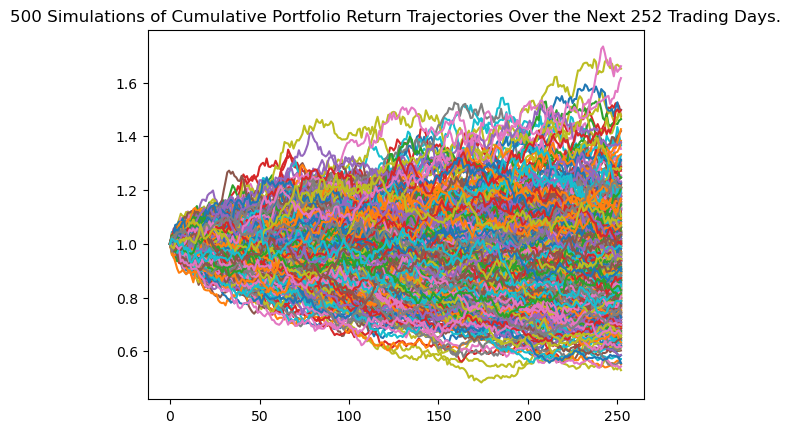

In [4]:
risk_simulation(ticker='VZ', years=1)

[*********************100%%**********************]  1 of 1 completed
VZ 35.619998931884766
The current value of your 70.19 VZ is $2500.00
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte

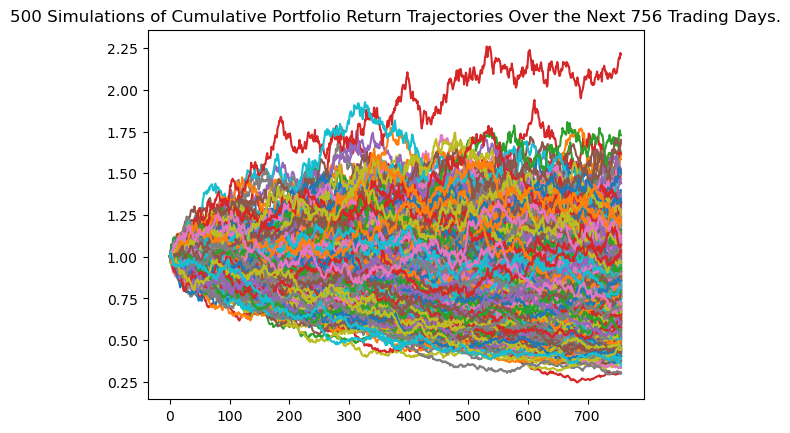

In [5]:
risk_simulation(ticker='VZ', years=3)

[*********************100%%**********************]  1 of 1 completed
VZ 35.619998931884766
The current value of your 70.19 VZ is $2500.00
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte

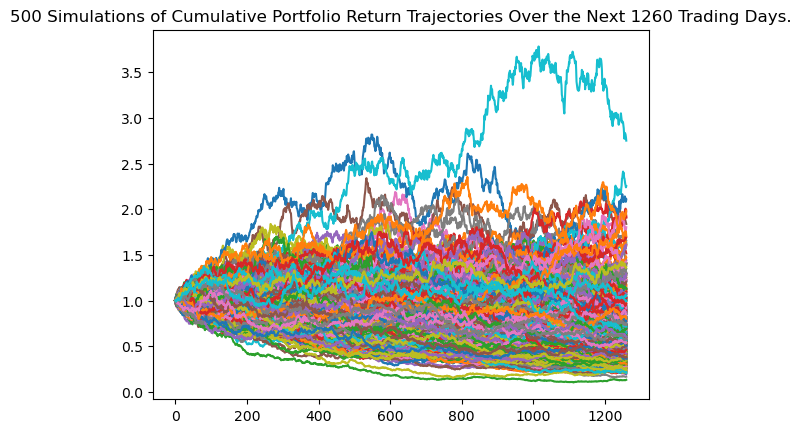

In [6]:
risk_simulation(ticker='VZ', years=5)

[*********************100%%**********************]  1 of 1 completed
VZ 35.619998931884766
The current value of your 70.19 VZ is $2500.00
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte

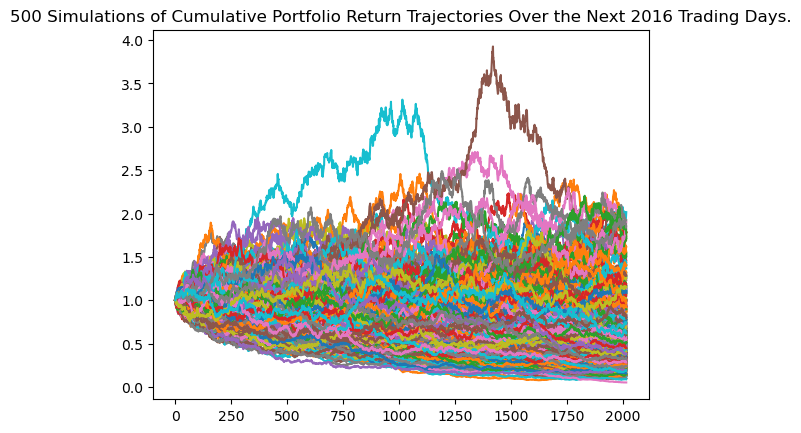

In [7]:
risk_simulation(ticker='VZ', years=8)

[*********************100%%**********************]  1 of 1 completed
VZ 35.619998931884766
The current value of your 70.19 VZ is $2500.00
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte

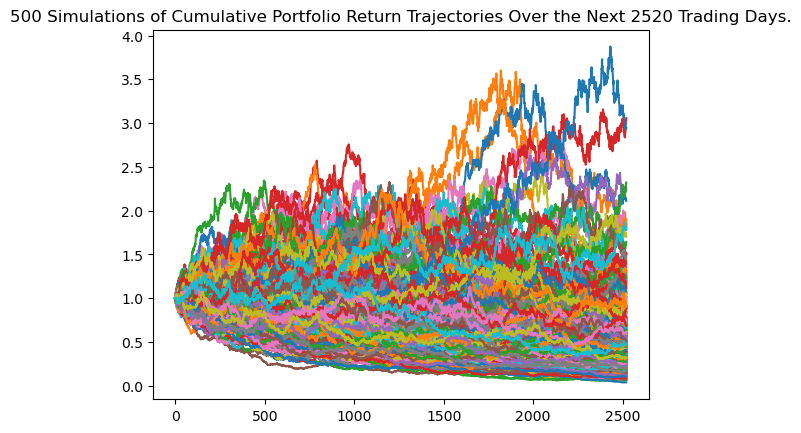

In [8]:
risk_simulation(ticker='VZ', years=10)

[*********************100%%**********************]  1 of 1 completed
VZ 35.619998931884766
The current value of your 70.19 VZ is $2500.00
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte

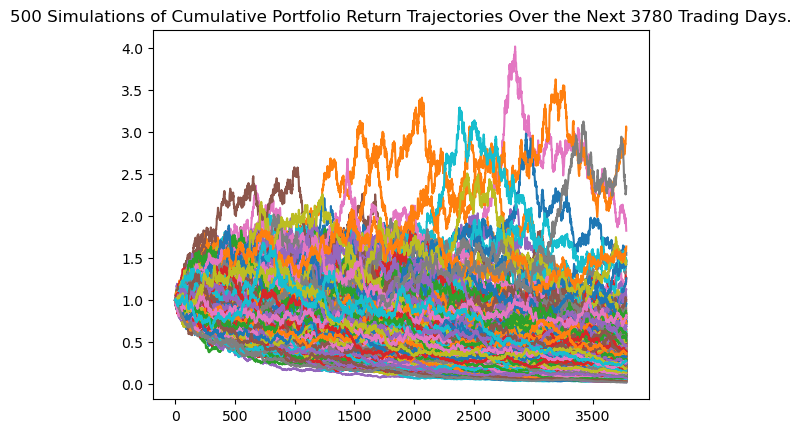

In [9]:
risk_simulation(ticker='VZ', years=15)